In [6]:

from stockfish import Stockfish
import chess
from feature_engineering import process_pgn_file, extract_features

In [4]:
def stockfish_cpl(moves):
    """ returns the average cpl of white and black"""
    stockfish=Stockfish("stockfish/stockfish-windows-x86-64-avx2.exe")
    stockfish.set_depth(12)#How deep the AI looks
    
    position_evals = []

    cpl_w = []
    cpl_b = []
    
    board = chess.Board()
    
    if len(moves) < 6:
        return ([], [], [])
    
    # exclude the first 6 moves in our analysis
    for j in range(6):
        board.push_san(moves[j]) 

    for i in range(6, len(moves)):
        # find the best move from stockfish
        stockfish.set_fen_position(board.fen())
        best_move = stockfish.get_best_move()

        # evaluate the stockfish move
        board.push_san(best_move)
        best_eval = stockfish.get_evaluation()
        board.pop()

        # evaluate the player move
        board.push_san(moves[i])
        stockfish.set_fen_position(board.fen())
        player_eval = stockfish.get_evaluation()

        position_evals.append(player_eval["value"])
        
        # continue if it is a mate
        if player_eval["type"] == "mate" or best_eval["type"] == "mate":
            position_evals.append(position_evals[-1])
            continue
        else:
            position_evals.append(player_eval["value"])
            if i%2 == 0:
                cpl_w.append(best_eval["value"] - player_eval["value"])
                
            else:
                cpl_b.append(player_eval["value"] - best_eval["value"])

    return (cpl_w, cpl_b, position_evals)

In [8]:
path = "Romeusand_vs_jinv3_2024.08.29.pgn"
games = process_pgn_file(path, 50000)
game = games[0]

In [9]:
out = extract_features(game)

In [11]:
print(out["white"])
out["white_cpl"]

[80, 80, 108, 108, 63, 63, 107, 107, 105, 105, 118, 118, 56, 56, 102, 102, 95, 95, 100, 100, 104, 104, 146, 146, 108, 108, 189, 189, 187, 187, 179, 179, 160, 160, 343, 343, 367, 367, 505, 505, 415, 415, 451, 451, 456, 456, 457, 457, 447, 447, 458, 458, 407, 407, 525, 525, 549, 549, 608, 608, 600, 600, 1, 1, 0, 0]


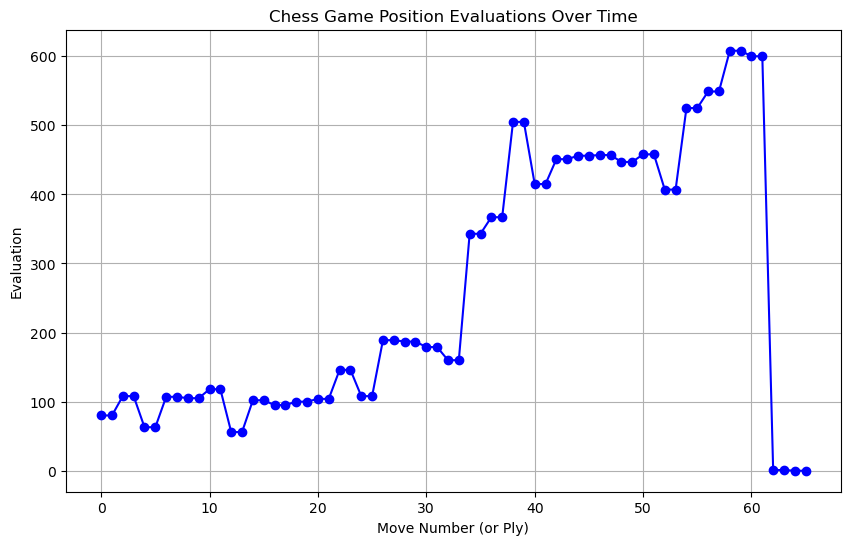

In [12]:
import matplotlib.pyplot as plt


# Plot the evaluations
plt.figure(figsize=(10, 6))
plt.plot(out["stockfish_eval"], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Chess Game Position Evaluations Over Time')
plt.xlabel('Move Number (or Ply)')
plt.ylabel('Evaluation')
plt.grid(True)

# Show the plot
plt.show()

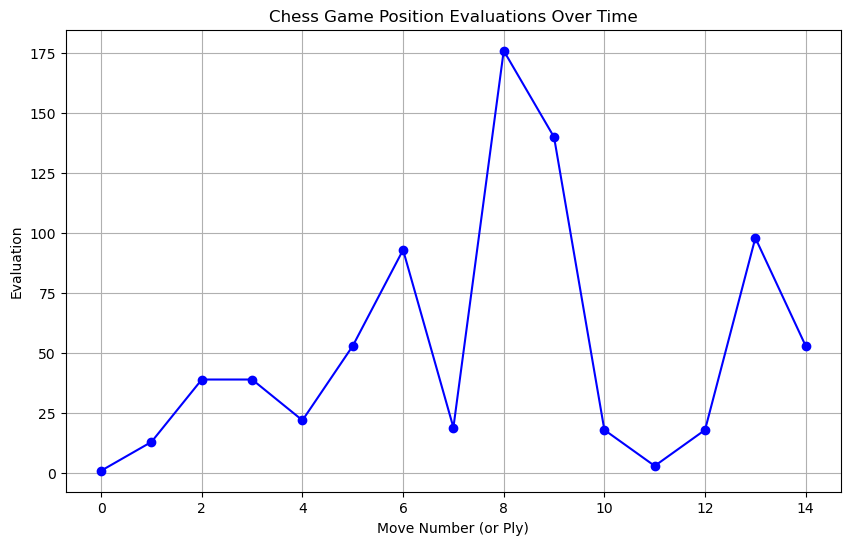

In [14]:
import matplotlib.pyplot as plt


# Plot the evaluations
plt.figure(figsize=(10, 6))
plt.plot(out["black_cpl"], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Chess Game Position Evaluations Over Time')
plt.xlabel('Move Number (or Ply)')
plt.ylabel('Evaluation')
plt.grid(True)

# Show the plot
plt.show()